# 基本数据结构

数据结构是计算机存储、组织数据的方式。数据结构是指相互之间存在一种或多种特定关系的数据元素的集合。通常情况下，精心选择的数据结构可以带来更高的运行或者存储效率。数据结构往往同高效的检索算法和索引技术有关

一般认为，一个数据结构是由数据元素依据某种逻辑联系组织起来的。对数据元素间逻辑关系的描述称为数据的逻辑结构；数据必须在计算机内存储，数据的存储结构是数据结构的实现形式，是其在计算机内的表示；此外讨论一个数据结构必须同时讨论在该类数据上执行的运算才有意义。一个逻辑数据结构可以有多种存储结构，且各种存储结构影响数据处理的效率。

在许多类型的程序的设计中，数据结构的选择是一个基本的设计考虑因素。许多大型系统的构造经验表明，系统实现的困难程度和系统构造的质量都严重的依赖于是否选择了最优的数据结构。许多时候，确定了数据结构后，算法就容易得到了。有些时候事情也会反过来，我们根据特定算法来选择数据结构与之适应。不论哪种情况，选择合适的数据结构都是非常重要的。

选择了数据结构，算法也随之确定，是数据而不是算法是系统构造的关键因素。这种洞见导致了许多种软件设计方法和程序设计语言的出现，面向对象的程序设计语言就是其中之一。

**线性表**

在程序中，经常需要将一组（通常是同为某个类型的）数据元素作为整体管理和使用，需要创建这种元素组，用变量记录它们，传进传出函数等。一组数据中包含的元素个数可能发生变化（可以增加或删除元素）。

对于这种需求，最简单的解决方案便是将这样一组元素看成一个序列，用元素在序列里的位置和顺序，表示实际应用中的某种有意义的信息，或者表示数据之间的某种关系。

这样的一组序列元素的组织形式，我们可以将其抽象为线性表。一个线性表是某类元素的一个集合，还记录着元素之间的一种顺序关系。线性表是最基本的数据结构之一，在实际程序中应用非常广泛，它还经常被用作更复杂的数据结构的实现基础。

根据线性表的实际存储方式，分为两种实现模型：

* 顺序表，将元素顺序地存放在一块连续的存储区里，元素间的顺序关系由它们的存储顺序自然表示。
* 链表，将元素存放在通过链接构造起来的一系列存储块中。


## 顺序表

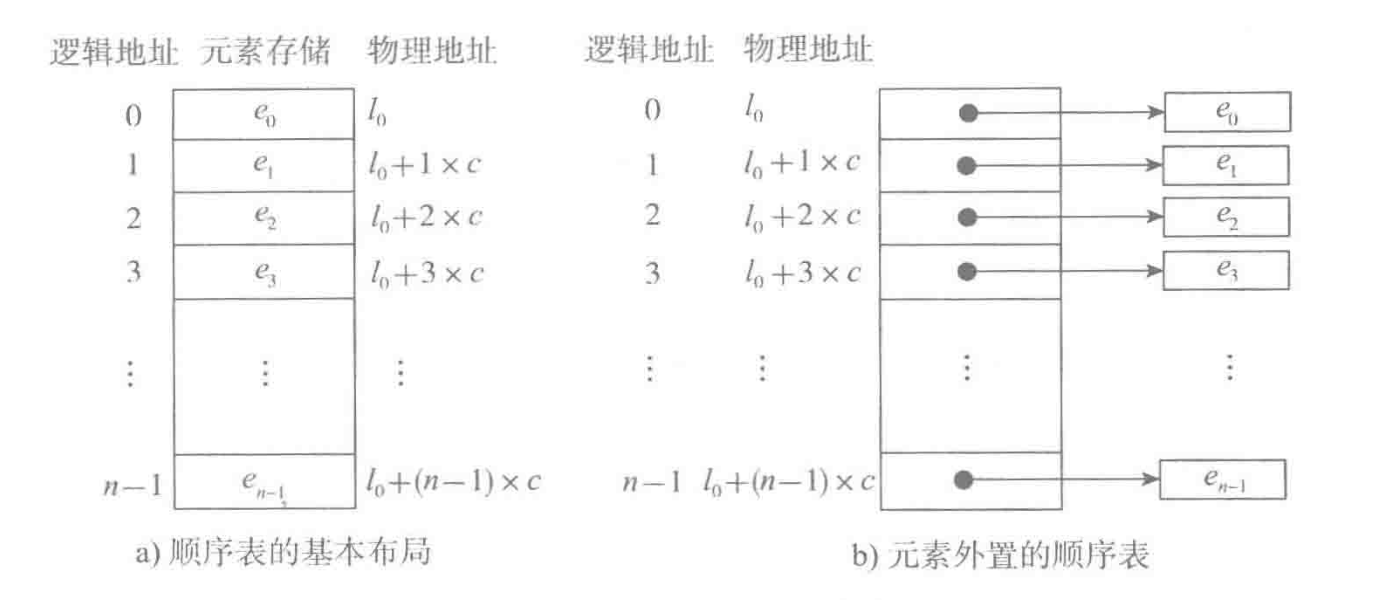
图a表示的是顺序表的基本形式，数据元素本身连续存储，每个元素所占的存储单元大小固定相同，元素的下标是其逻辑地址，而元素存储的物理地址（实际内存地址）可以通过存储区的起始地址Loc (e0)加上逻辑地址（第i个元素）与存储单元大小（c）的乘积计算而得，即：

Loc(ei) = Loc(e0) + c*i

故，访问指定元素时无需从头遍历，通过计算便可获得对应地址，其时间复杂度为O(1)。

如果元素的大小不统一，则须采用图b的元素外置的形式，将实际数据元素另行存储，而顺序表中各单元位置保存对应元素的地址信息（即链接）。由于每个链接所需的存储量相同，通过上述公式，可以计算出元素链接的存储位置，而后顺着链接找到实际存储的数据元素。注意，图b中的c不再是数据元素的大小，而是存储一个链接地址所需的存储量，这个量通常很小。

图b这样的顺序表也被称为对实际数据的索引，这是最简单的索引结构

**增加元素**


a. 尾端加入元素，时间复杂度为O(1)

b. 非保序的加入元素（不常见），时间复杂度为O(1)

c. 保序的元素加入，时间复杂度为O(n)

**删除元素**

a. 删除表尾元素，时间复杂度为O(1)

b. 非保序的元素删除（不常见），时间复杂度为O(1)

c. 保序的元素删除，时间复杂度为O(n)

**Python中的顺序表**

Python中的list和tuple两种类型采用了顺序表的实现技术，具有前面讨论的顺序表的所有性质。

tuple是不可变类型，即不变的顺序表，因此不支持改变其内部状态的任何操作，而其他方面，则与list的性质类似。
list的基本实现技术

Python标准类型list就是一种元素个数可变的线性表，可以加入和删除元素，并在各种操作中维持已有元素的顺序（即保序），而且还具有以下行为特征：

   * 基于下标（位置）的高效元素访问和更新，时间复杂度应该是O(1)；

   * 为满足该特征，应该采用顺序表技术，表中元素保存在一块连续的存储区中。

   * 允许任意加入元素，而且在不断加入元素的过程中，表对象的标识（函数id得到的值）不变。

   * 为满足该特征，就必须能更换元素存储区，并且为保证更换存储区时list对象的标识id不变，只能采用分离式实现技术。

在Python的官方实现中，list就是一种采用分离式技术实现的动态顺序表。这就是为什么用list.append(x) （或 list.insert(len(list), x)，即尾部插入）比在指定位置插入元素效率高的原因。

在Python的官方实现中，list实现采用了如下的策略：在建立空表（或者很小的表）时，系统分配一块能容纳8个元素的存储区；在执行插入操作（insert或append）时，如果元素存储区满就换一块4倍大的存储区。但如果此时的表已经很大（目前的阀值为50000），则改变策略，采用加一倍的方法。引入这种改变策略的方式，是为了避免出现过多空闲的存储位置。


## 链表

**为什么需要链表** 

顺序表的构建需要预先知道数据大小来申请连续的存储空间，而在进行扩充时又需要进行数据的搬迁，所以使用起来并不是很灵活。

链表结构可以充分利用计算机内存空间，实现灵活的内存动态管理。 

**链表的定义**

链表（Linked list）是一种常见的基础数据结构，是一种线性表，但是不像顺序表一样连续存储数据，而是在每一个节点（数据存储单元）里存放下一个节点的位置信息（即地址）

### 单向链表

单向链表也叫单链表，是链表中最简单的一种形式，它的每个节点包含两个域，一个信息域（元素域）和一个链接域。这个链接指向链表中的下一个节点，而最后一个节点的链接域则指向一个空值。

    表元素域elem用来存放具体的数据。
    链接域next用来存放下一个节点的位置（python中的标识）
    变量p指向链表的头节点（首节点）的位置，从p出发能找到表中的任意节点。


二者的优缺点比较

①空间上的比较（Space） 
1. 空间的开辟： 
顺序表的实现一般是实现连续开辟一段空间，然后在进行数据的增删查改（静态顺序表），所以顺序表一般是固定空间大小的；而单链表则是一次只开辟一个结点的空间，用来存储当前要保存的数据及指向下一个结点或NULL的指针，所以单链表的空间大小时动态变化的。（当然，顺序表也可以在初始化时利用malloc函数来开辟一块空间，每当空间不够用时，再用realloc来把当前空间扩容成2倍，从而也能实现空间的动态变化（动态顺序表））。 
 
2. 空间的使用： 
当我们不知道要存储多少数据时，用顺序表来开辟的空间如果太大，就会造成一定程度上的浪费，而用单链表是实现时，因为是每需要存储一个数据时，才开辟一个空间，虽然有非数据项的指针占空间，但相比顺序表来说，浪费不是那么明显；反之，当我们知道存储的数据的数量时，用顺序表来开辟对应的空间大小，来存储数据，因为顺序表中每个元素的存储密度为 1，就完全不会有浪费的空间，而用单链表，因为每个结点都会有非数据项得指针，那么就会造成空间的浪费。再者，编译器会为每个程序从内存上分配一段空间，给该程序使用。然而我们每次开辟空间时都是在随机的位置开辟的，那么使用单链表，就会多次的在程序分配到的这块空间上开辟空间，因为每次都是开辟的位置都是随机的，那么可能会把这块空间搞得七零八碎，出现很多小的一般使用不到的碎片空间，这样很大程度上造成了空间的浪费，而使用顺序表的话，不会经常开辟空间，这样就减少了碎片空间的出现，那么就一定程度上节省了空间。 

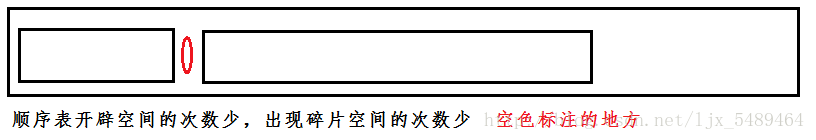

3. 对CPU高速缓存的影响： 
因为顺序表的空间一般是连续开辟的，而且一次会开辟存储多个元素的空间，所以在使用顺序表时，可以一次把多个数据写入高速缓存，再写入主存，顺序表的CPU高速缓存效率更高，且CPU流水线也不会总是被打断；而单链表是每需要存储一个数据才开辟一次空间，所以每个数据存储时都要单独的写入高速缓存区，再写入主存，这样就造成了，单链表CPU高速缓存效率低，且CPU流水线会经常被打断。

②时间上的比较（Time）

1. 访问随机元素的时间复杂度： 
因为顺序表的结构就像是数组一样，可以用下标来访问它的元素，所以它的元素是支持随机访问的；相比之下，单链表的数据是链式存储的，它的元素是不支持随机访问的，想要知道某个元素，只能从头结点开始遍历整个链表，知道找到了该元素为止。因此顺序表访问随机元素的时间复杂度是O（1），而单链表访问随机元素的平均时间复杂度是O（n）。

2. 随机位置插入、删除元素的时间复杂度： 
因为顺序表的元素是连续存储的，因此要在特定位置插入、删除元素需要把它之后的元素全部后移或前移一个元素的位置，时间开销很大；而单链表在插入或删除元素时，只需要改变它的前驱元素及插入或删除元素的指向即可。因此，顺序表在插入随机位置插入、删除元素的平均时间复杂度是O（n），单链表在插入随机位置插入、删除元素的时间复杂度是O（1）。

一般来说线性表（顺序表和单链表都属于线性表）的插入删除操作会被执行的频繁一些，因此，使用单链表的频率较大。

**Summary**

综合上述所言，顺序表和单链表各有各的优缺点，使用哪一种会好一些要结合具体的问题而言，不能一概而论。 
比如： 
在查询操作使用的比较频繁时，使用顺序表会好一些；在插入、删除操作使用的比较频繁时，使用单链表会好一些。

PS：使用顺序表和链表都必须满足每个元素占有相同大小的内存空间，并且这个大小是固定的

In [28]:
class SingleNode(object):
    def __init__(self, item):
        self.item = item
         # _item存放数据元素
        self.next = None
         # _next是下一个节点的标识

In [31]:
class SingleLinkList(object):
    def __init__(self):
        self._head = None
    
    def is_empty(self):
        #判断链表是否为空
        return self._head == None
    
    def length(self):
        cur = self._head
        #cur初始时指向头节点
        count = 0
        #尾节点指向None， 当未达到尾部时
        while cur != None:
            count += 1
            cur = cur.next
            # 将cur后移一个节点
        return count
    
    def travel(self):
        #遍历链表
        cur = self._head
        while cur != None:
            print(cur.item)
            cur = cur.next
        print("")
        
    def add(self, item):
        #头部添加元素
        node = SingleNode(item)
        #先创建一个保存item值的节点
        node.next = self._head
        #将新节点的链接域next指向头节点， 即_head指向的位置
        self._head = node

    def append(self, item):
        #尾部添加元素
        node = SingleNode(item)
        if self.is_empty():
            self_head = node
        #先判断链表是否为空，若是空链表，则将_head指向新节点
        else:
            cur = self._head
            while cur.next != None:
                cur = cur.next
            cur.next = node
        # 若不为空，则找到尾部，将尾节点的next指向新节点
        
    def insert(self, pos, item):
        #指定位置添加元素
        if pos <= 0:
            self.add(item)
        #若指定位置pos为第一个元素前，则执行头部插入
        elif pos > (self.length()-1):
            self.append(item)
        #若指定位置超过链表尾部，则执行尾部插入
        else:
            node = SingleNode(item)
            count = 0

            pre = self._head
            #pre用来指向指定位置pos的前一个位置pos-1， 初始从头节点开始到指定位置
            while count < (pos - 1):
                count += 1
                pre = pre.next

            node.next = pre.next
            #先将新节点node的next指向插入位置的节点
            pre.next = node
            #将插入位置的前一个节点的next指向新节点
            
    def remove(self, item):
        cur = self._head
        pre = None
        while cur != None:
            #找到指定元素
            if cur.item == item:
                #如果第一个就是删除的节点
                if not pre:
                    self._head = cur.next
                    #将头指针指向头节点的后一个节点
                else:
                    pre.next = cur.next
                    #将删除位置的前一个节点的next指向删除位置的后一个节点
                break
            else:
                pre = cur
                cur = cur.next
            
    def search(self, item):
        cur = self._head
        while cur != None:
            if cur.item == item:
                return True
            cur = cur.next
        return False

In [32]:
if __name__ == "__main__":
    ll = SingleLinkList()
    ll.add(1)
    ll.add(2)
    ll.append(3)
    ll.insert(2, 4)
    print("length:",ll.length())
    ll.travel()
    print(ll.search(3))
    print(ll.search(5))
    ll.remove(1)
    print("length:",ll.length())
    ll.travel()
    

length: 4
2
1
4
3

True
False
length: 3
2
4
3



### 单向循环链表

单链表的一个变形是单向循环链表，链表中最后一个节点的next域不再为None，而是指向链表的头节点。

单向循环链表

In [10]:
class Node(object):
    #节点
    def __init__(self, item):
        self.item = item
        self.next = None
        

In [11]:
class SinCycLinkedlist(object):
    #单向循环链表
    def __init__(self):
        #链表初始化
        self._head = None
    
    def is_empty(self):
        #判断是否为空
        return self._head == None
    
    def length(self):
        #计算链表的长度
        if self.is_empty():
            return 0
        count = 1
        cur = self._head
        while cur.next != self._head:
            count += 1
            cur = cur.next
        return count
    
    
    def travel(self):
        #遍历链表
        if self.is_empty():
            return 
        cur = self._head
        print(cur.item)
        while cur.next != self._head:
            cur = cur.next
            print(cur.item,)
        print("")
    
    def add(self, item):
        #头部添加节点
        node = Node(item)
        if self.is_empty():
            self._head = node
            node.next =self._head
        else:
            #添加节点指向_head
            node.next = self._head
            #移动到链表尾部，将尾部节点的next指向node
            cur = self._head
            while cur.next != self._head:
                cur = cur.next
            cur.next = node
            self._head = node
    
    def append(self, item):
        #尾部添加节点
        node = Node(item)
        if self.is_empty():
            self._head = node
            node.next = self._head
        else:
            #移动到链表尾部
            cur = self._head
            while cur.next != self._head:
                cur = cur.next
            #将尾节点指向node
            cur.next = node
            #将node指向头节点_head
            node.next = self._head
            
    
    def insert(self, pos, item):
        #在指定位置添加节点
        if pos <= 0 :
            self.add(item)
        elif pos > (self.length()-1):
            self.append(item)
        else:
            node = Node(item)
            cur = self._head
            count = 0
            while count < (pos -1 ):
                count += 1
                cur = cur.next
            node.next = cur.next
            cur.next = node
        
    def remove(self, item):
        if self.is_empty():
            return 
        cur = self._head
        pre = None
        # 若头节点的元素就是要查找的元素item
        if cur.item ==item:
            if cur.next != self._head:
                while cur.next != self._head:
                    cur = cur.next
                cur.next = self._head.next
                self._head = self._head.next
            else:
                self._head = None
        else:
            pre = self._head
            while cur.next != self._head:
                if cur.item ==item:
                    pre.next =cur.next
                    return 
                else:
                    pre = cur
                    cur = cur.next
            if cur.item ==item:
                pre.next =cur.next
    
    def search(self, item):
        if self.is_empty():
            return False
        cur = self._head
        if cur.item ==item:
            return True
        while cur.next != self._head:
            cur = cur.next
            if cur.item ==item:
                return True
        return False

In [12]:
if __name__ == "__main__":
    ll = SinCycLinkedlist()
    ll.add(1)
    ll.add(2)
    ll.append(3)
    ll.insert(2, 4)
    ll.insert(4, 5)
    ll.insert(0, 6)
    print( "length:",ll.length())
    ll.travel()
    print(ll.search(3))
    print( ll.search(7))
    ll.remove(1)
    print("length:",ll.length())
    ll.travel()

length: 6
6
2
1
4
3
5

True
False
length: 5
6
2
4
3
5



### 双向链表

一种更复杂的链表是“双向链表”或“双面链表”。每个节点有两个链接：一个指向前一个节点，当此节点为第一个节点时，指向空值；而另一个指向下一个节点，当此节点为最后一个节点时，指向空值。

In [49]:
class Node(object):
    #双向链表节点
    def __init__(self, item):
        self.item = item
        self.next = None
        self.prev = None
        
        
class DLinkList(object):
    #双向链表
    def __init__(self):
        self._head = None

    def is_empty(self):
        #判断链表是否为空
        return self._head ==None

    def length(self):
        #返回链表的长度
        cur = self._head
        count = 0
        while cur != None:
            count += 1
            cur = cur.next
        return count

    def travel(self):
        """遍历链表"""
        cur = self._head
        while cur != None:
            print(cur.item)
            cur = cur.next
        print("")
    
    def add(self,item):
        #头部插入元素
        node = Node(item)
        if self.is_empty():
            #如果是空链表，将_head 指向node
            self._head = node
        else:
            #将node的next指向_head的头节点
            node.next = self._head
            #将_head的头节点的prev指向node
            self._head.prev = node
            #将_head指向node
            self._head = node

    def append(self, item):
        #尾部插入元素
        node = Node(item)
        if self.is_empty():
            self._head = node
        else:
            #移动到链表尾部
            cur = self._head 
            while cur.next != None:
                cur = cur.next
            #将尾节点cur的next指向node
            cur.next = node 
            #将node的prev指向cur
            node.prev = cur
            
            
    def search(self, item):
        #查找元素是否存在
        cur = self._head
        while cur != None:
            if cur.item == item:
                return True
            cur = cur.next
        return False

    def insert(self, pos, item):
        #在指定位置添加节点
        if pos <= 0:
            self.add(item)
        elif pos > (self.length()-1):
            self.append(item)
        else:
            node = Node(item)
            cur = self._head
            count = 0
            # 移动到指定位置的前一个位置
            while count < (pos-1):
                count += 1
                cur = cur.next
            # 将node的prev指向cur
            node.prev = cur
            # 将node的next指向cur的下一个节点
            node.next = cur.next
            # 将cur的下一个节点的prev指向node
            cur.next.prev = node
            # 将cur的next指向node
            cur.next = node   

    def remove(self, item):
        #删除元素
        if self.is_empty():
            return
        else:
            cur = self._head
            if cur.item == item:
                # 如果首节点的元素即是要删除的元素
                if cur.next == None:
                    # 如果链表只有这一个节点
                    self._head = None
                else:
                    # 将第二个节点的prev设置为None
                    cur.next.prev = None
                    # 将_head指向第二个节点
                    self._head = cur.next
                return
            while cur != None:
                if cur.item == item:
                    # 将cur的前一个节点的next指向cur的后一个节点
                    cur.prev.next = cur.next
                    # 将cur的后一个节点的prev指向cur的前一个节点
                    cur.next.prev = cur.prev
                    break
                cur = cur.next

In [50]:
if __name__ == "__main__":
    ll = DLinkList()
    ll.add(1)
    ll.add(2)
    ll.append(3)
    ll.insert(2, 4)
    ll.insert(4, 5)
    ll.insert(0, 6)
    print( "length:",ll.length())
    ll.travel()
    print( ll.search(3))
    print( ll.search(4))
    ll.remove(1)
    print("length:",ll.length())
    ll.travel()

length: 6
6
2
1
4
3
5

True
True
length: 5
6
2
4
3
5



## 栈结构

栈（stack），有些地方称为堆栈，是一种容器，可存入数据元素、访问元素、删除元素，它的特点在于只能允许在容器的一端（称为栈顶端指标，英语：top）进行加入数据（英语：push）和输出数据（英语：pop）的运算。

没有了位置概念，保证任何时候可以访问、删除的元素都是此前最后存入的那个元素，确定了一种默认的访问顺序。

由于栈数据结构只允许在一端进行操作，因而按照后进先出（LIFO, Last In First Out）的原理运作。

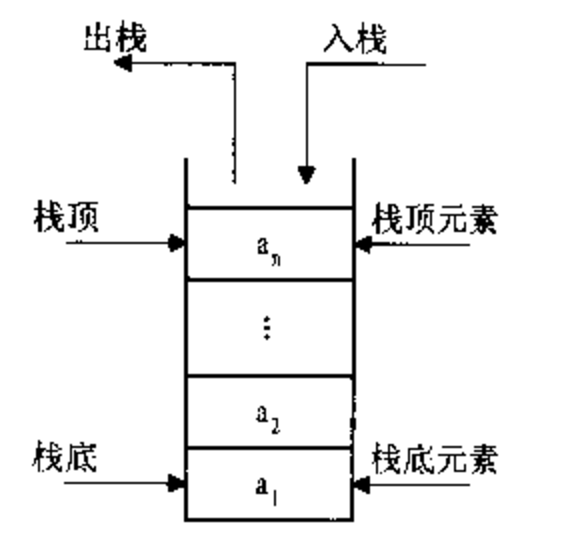

一个函数设计里面，有2个问题：

1. 是参数传递的问题。传递参数的目的，是为了代码可以重用，让一种方法可以应用到更多的场合，而不需要为N种情况写N套类似的代码。那用什么方法来做参数的传递，可以选择:
     a.为了速度快，使用cpu的寄存器传递参数。这会碰到一个问题，cpu寄存器的数量是有限的，当函数内再想调用子函数的时候，再使用原有的cpu寄存器就会冲突了。想利用寄存器传参，就必须在调用子函数前吧寄存器存储起来，然后当函数退出的时候再恢复。
     b.利用某些ram的区域来传递参数。这和上面a的情况几乎一样，当函数嵌套调用的时候，还是会出现冲突，依然面临要把原本数据保存到其他地方，再调用嵌套函数。并且保存到什么地方，也面临困难，无论临时存储到哪里，都会有上面传递参数一样的困境。
2. 函数里面必然要使用到局部变量，而不能总是用全局变量。则局部变量存储到哪里合适，即不能让函数嵌套的时候有冲突，又要注重效率。

以上问题的解决办法，都可以利用栈的结构体来解决，寄存器传参的冲突，可以把寄存器的值临时压入栈里面，非寄存器传参也可以压入到栈里面，局部变量的使用也可以利用栈里面的内存空间，只需要移动下栈指针，腾出局部变量占用的空间。最后利用栈指针的偏移来完成存取。于是函数的这些参数和变量的存储演变成记住一个栈指针的地址，每次函数被调用的时候，都配套一个栈指针地址，即使循环嵌套调用函数，只要对应函数栈指针是不同的，也不会出现冲突。利用栈，当函数不断调用的时候，不断的有参数局部变量入栈，栈里面会形成一个函数栈帧的结构，一个栈帧结构归属于一次函数的调用。栈的空间也是有限的，如果不限制的使用，就会出现典型的栈溢出的问题。有了栈帧的框架在，我们在分析问题的时候，如果能获取到当时的栈的内容，则有机会调查当时可能出现的问题。

 经过上面的简单介绍，应该可以看出栈在程序设计里面的作用，它是每个函数架构的基础，有了它，才可以实现函数的重复利用。而为了更高的提高效率，每个cpu在设计的时候都有自己独立的堆栈指令，例如push pop，有堆栈寄存器存储堆栈指针，如ARM的R13寄存器，来尽可能的加速对栈的操作。
      但这是在汇编机器语言的角度上看到的情况，在c语言的角度上看，明显有意隐藏了栈的存在，这也是高级语言的意义，让我们更关注功能本身，而不是如何被翻译成机器代码。但是了解它也有重要的意义，像上面说道的，问题发生的时候，利用栈来了解问题发生的情况十分必要。

In [8]:
class Stack(object):
    #构造初始化
    def __init__(self):
        self.items = []
    
    #判断是否维空
    def is_empty(self):
        return self.items ==[]
    
    #加入元素
    def push(self, item):
        self.items.append(item)
    
    #弹出元素
    def pop(self):
        return self.items.pop()
    #在尾部加入时间复杂度O（1）弹出O（1）
    #如果在头部加入时间复杂度O（n）弹出O（n）
    
    #返回栈顶元素
    def peek(self):
        return self.items[len(self.items)-1]
    
    #返回栈的大小
    def size(self):
        return len(self.items)

In [13]:
stack = Stack()
stack.push("hello")
stack.push("world")
stack.push("itcast")
print(stack.items)
print(stack.size())
print(stack.peek())
print(stack.pop())
print(stack.pop())
print(stack.pop())
print(stack.is_empty())

['hello', 'world', 'itcast']
3
itcast
itcast
world
hello
True


# 队列的实现

队列（queue）是只允许在一端进行插入操作，而在另一端进行删除操作的线性表。

队列是一种先进先出的（First In First Out）的线性表，简称FIFO。允许插入的一端为队尾，允许删除的一端为队头。队列不允许在中间部位进行操作！假设队列是q=（a1，a2，……，an），那么a1就是队头元素，而an是队尾元素。这样我们就可以删除时，总是从a1开始，而插入时，总是在队列最后。这也比较符合我们通常生活中的习惯，排在第一个的优先出列，最后来的当然排在队伍最后。

In [27]:
class Queue(object):
    #初始化构造方法
    def __init__(self):
        self.items = []
    
    #在队列中添加一个元素
    def enqueue(self, item):
        self.items.append(item)
#         self.items.insert(0, item)
    
    #从队列中弹出一个元素（与添加对应，头部添加尾部弹出，尾部添加头部弹出）
    def dequeue(self):
        return self.items.pop(0)
#      return self.pop()

    #上述使用时看进行弹出操作较多还是进行添加操作多选择方式
    
    def is_empty(self):
        return self.items ==[]
    
    def size(self):
        return len(self.items)

In [28]:
s = Queue()
s.enqueue(1)
s.enqueue(2)
s.enqueue(3)
s.enqueue(4)
print(s.items)

[1, 2, 3, 4]


In [29]:
print(s.dequeue())
print(s.dequeue())
print(s.dequeue())
print(s.dequeue())

1
2
3
4


In [37]:
class Deque(object):
    #初始化构造方法
    def __init__(self):
        self.items = []
    
    #在队列中添加一个元素
    def add_front(self, item):
        self.items.insert(0, item)
        
    def add_rear(self, item):
        self.items.append(item)
    
    #从队列中弹出一个元素（与添加对应，头部添加尾部弹出，尾部添加头部弹出）
    def remove_front(self):
        return self.items.pop(0)
    
    def remove_rear(self):
         return self.items.pop()

    #上述使用时看进行弹出操作较多还是进行添加操作多选择方式
    
    def is_empty(self):
        return self.items ==[]
    
    def size(self):
        return len(self.items)


In [38]:
deque = Deque()
deque.add_front(1)
deque.add_front(2)
deque.add_rear(3)
deque.add_rear(4)
print(deque.items)

[2, 1, 3, 4]


In [39]:
print(deque.remove_front())
print(deque.remove_front())
print(deque.remove_rear())
print(deque.remove_rear())

2
1
4
3
